# Load Dataset 

In [174]:
import pandas as pd
import numpy as np

In [175]:
df=pd.read_csv("Titanic-Dataset.csv")

In [176]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,NaN,Q
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.000,NaN,C
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.250,NaN,S
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.000,NaN,S
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.500,NaN,S


# Data Cleaning

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [178]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
600,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.475,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S


In [179]:
df.duplicated().sum()

0

### Age Column

In [180]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [181]:
df["Age"].median()

28.0

In [182]:
df["Age"].fillna(df["Age"].median(),inplace=True)

C:\Users\Debasish Das\AppData\Local\Temp\ipykernel_8276\860536840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(),inplace=True)


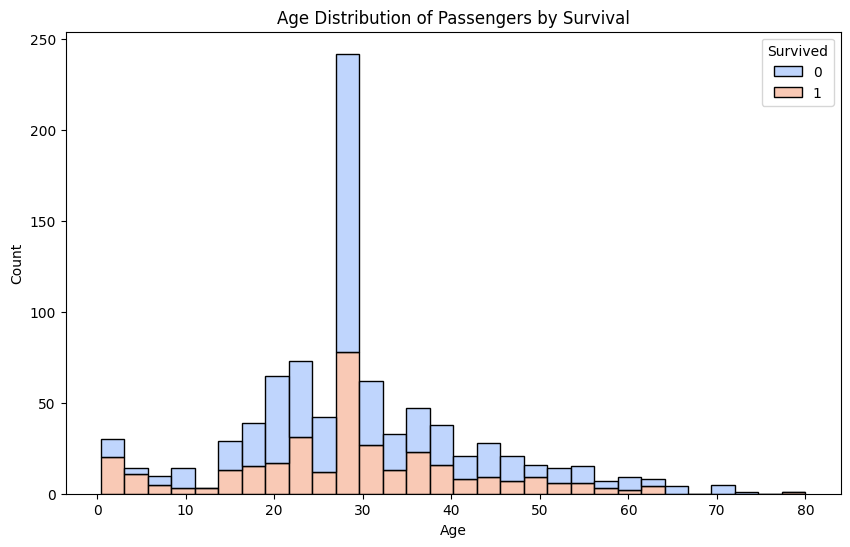

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', palette='coolwarm', kde=False)
plt.title('Age Distribution of Passengers by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [184]:
bin=[0,10,20,40,60,90]
lavel=["Child","Teen","Adult","Middle_Age","Old"]
df["Age group"]=pd.cut(df["Age"],bins=bin,labels=lavel)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age group    891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [186]:
df.drop(columns=["Age"],inplace=True)

In [187]:
df=pd.get_dummies(df,columns=["Age group"]) # one hot encodeing

### Cabin column

In [188]:
df["Cabin"].isnull().sum()
# 687
#We don't have enhough data so we are delete the row
df.drop(columns=["Cabin"],inplace=True)

In [189]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age group_Child,Age group_Teen,Age group_Adult,Age group_Middle_Age,Age group_Old
234,235,0,2,"Leyson, Mr. Robert William Norman",male,0,0,C.A. 29566,10.5,S,False,False,True,False,False
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,0,0,W./C. 14263,10.5,S,False,False,True,False,False
526,527,1,2,"Ridsdale, Miss. Lucy",female,0,0,W./C. 14258,10.5,S,False,False,False,True,False


### Sex and Pclass Column

In [190]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

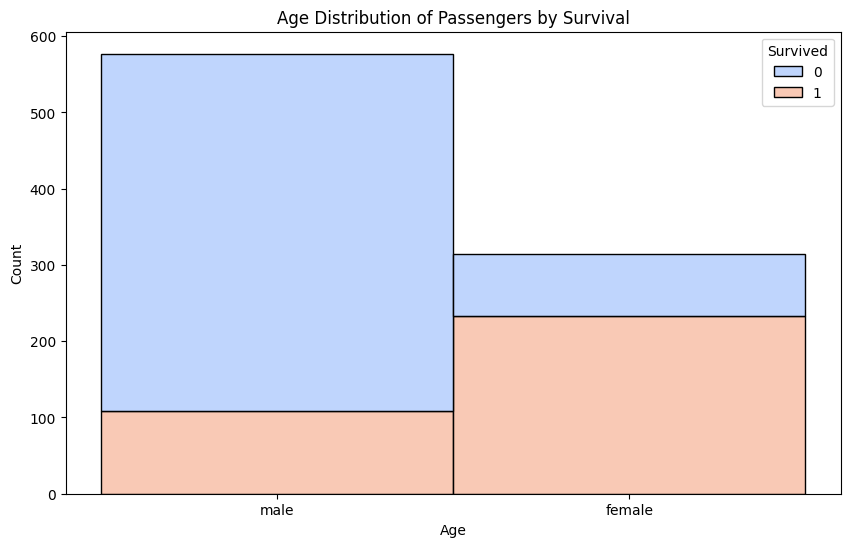

In [191]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sex', hue='Survived', multiple='stack', palette='coolwarm', kde=False)
plt.title('Age Distribution of Passengers by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [192]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

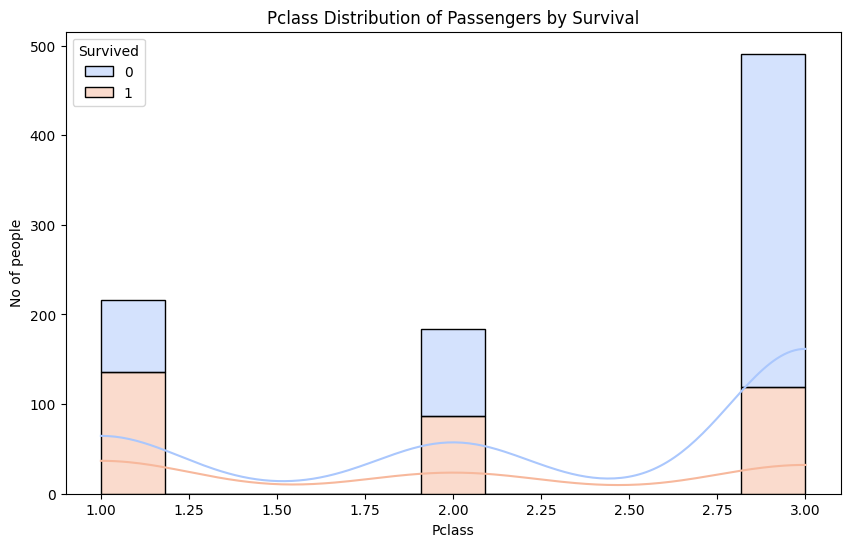

In [193]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Pclass', hue='Survived', multiple='stack', palette='coolwarm', kde=True)
plt.title('Pclass Distribution of Passengers by Survival')
plt.xlabel('Pclass')
plt.ylabel('No of people')
plt.show()

In [194]:
# One-hot encode the 'Sex' column
df = pd.get_dummies(df, columns=['Sex'])

# Display the first few rows of the modified dataset
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  SibSp  Parch  \
0                            Braund, Mr. Owen Harris      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      1      0   
2                             Heikkinen, Miss. Laina      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      1      0   
4                           Allen, Mr. William Henry      0      0   

             Ticket     Fare Embarked  Age group_Child  Age group_Teen  \
0         A/5 21171   7.2500        S            False           False   
1          PC 17599  71.2833        C            False           False   
2  STON/O2. 3101282   7.9250        S            False           False   
3            113803  53.1000        S            False           F

### Embarked Column

In [195]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [196]:
df["Class"]=df["Embarked"].map({'C':1,'Q':2,'S':3})

In [197]:
df['Class'].sample(2)
"""Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)"""

'Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)'

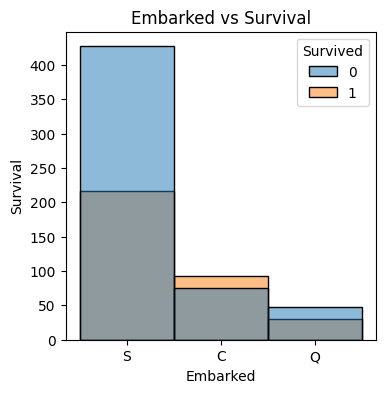

In [198]:
plt.figure(figsize=(4,4))
sns.histplot(data=df,x="Embarked",hue="Survived")
plt.title("Embarked vs Survival")
plt.xlabel("Embarked")
plt.ylabel("Survival")
plt.show()

### SipSp And Parch Column

In [199]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Embarked,Age group_Child,Age group_Teen,Age group_Adult,Age group_Middle_Age,Age group_Old,Sex_female,Sex_male,Class
404,405,0,3,"Oreskovic, Miss. Marija",0,0,315096,8.6625,S,False,True,False,False,False,True,False,3.0
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",0,0,347078,7.7500,S,False,True,False,False,False,False,True,3.0
501,502,0,3,"Canavan, Miss. Mary",0,0,364846,7.7500,Q,False,False,True,False,False,True,False,2.0
260,261,0,3,"Smith, Mr. Thomas",0,0,384461,7.7500,Q,False,False,True,False,False,False,True,2.0
369,370,1,1,"Aubart, Mme. Leontine Pauline",0,0,PC 17477,69.3000,C,False,False,True,False,False,True,False,1.0


In [200]:
df["SibSp"].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [201]:
df["Parch"].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [202]:
df["Family_member"]=df["Parch"]+df["SibSp"]

In [203]:
df.sample()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Embarked,Age group_Child,Age group_Teen,Age group_Adult,Age group_Middle_Age,Age group_Old,Sex_female,Sex_male,Class,Family_member
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",0,0,312992,7.775,S,False,False,True,False,False,False,True,3.0,0


In [204]:
df.drop(columns=["Parch","SibSp"],inplace=True)

In [205]:
df.drop(columns=["Embarked"],inplace=True)

### Fare Column

C:\Users\Debasish Das\AppData\Local\Temp\ipykernel_8276\2879774509.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Fare', multiple='stack', palette='coolwarm', kde=False)


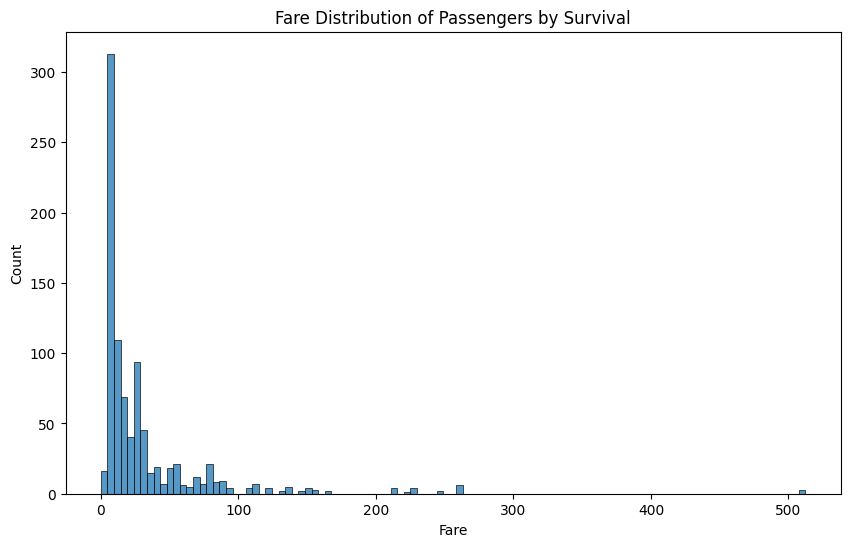

In [206]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Fare', multiple='stack', palette='coolwarm', kde=False)
plt.title('Fare Distribution of Passengers by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

C:\Users\Debasish Das\AppData\Local\Temp\ipykernel_8276\1450544794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, y='Fare', palette='coolwarm')


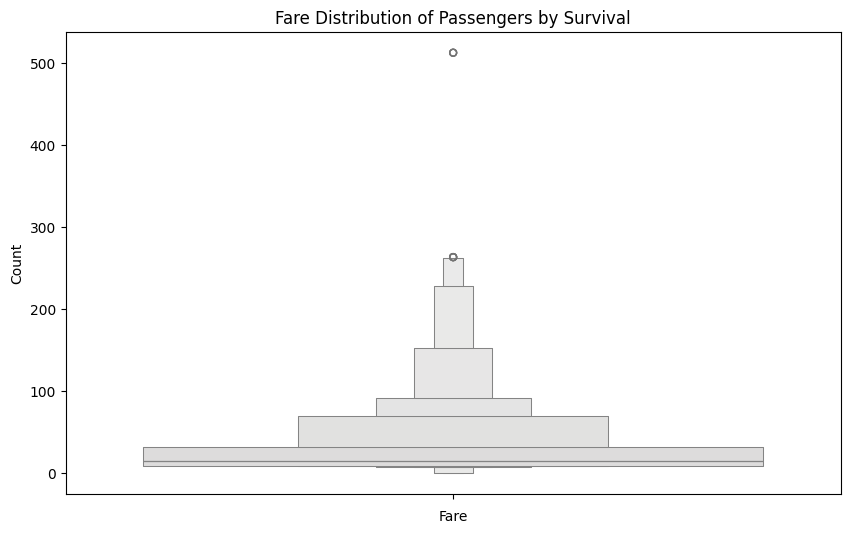

In [207]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, y='Fare', palette='coolwarm')
plt.title('Fare Distribution of Passengers by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [208]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Ticket,Fare,Age group_Child,Age group_Teen,Age group_Adult,Age group_Middle_Age,Age group_Old,Sex_female,Sex_male,Class,Family_member
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",17466,25.9292,False,False,False,True,False,True,False,3.0,0
474,475,0,3,"Strandberg, Miss. Ida Sofia",7553,9.8375,False,False,True,False,False,True,False,3.0,0
87,88,0,3,"Slocovski, Mr. Selman Francis",SOTON/OQ 392086,8.0500,False,False,True,False,False,False,True,3.0,0
34,35,0,1,"Meyer, Mr. Edgar Joseph",PC 17604,82.1708,False,False,True,False,False,False,True,1.0,1
596,597,1,2,"Leitch, Miss. Jessie Wills",248727,33.0000,False,False,True,False,False,True,False,3.0,0


### Name Column

In [209]:
df["Title"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())

In [210]:
df["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [211]:
df["Title"].replace(["Dr","Col","Rev","Ms","Dona","Major",
"Mlle",
"Don",
"Mme",
"Lady",
"Sir",
"Capt",
"the Countess",
"Jonkheer"],"Other",inplace=True)
df["Title"].value_counts()

C:\Users\Debasish Das\AppData\Local\Temp\ipykernel_8276\1431326651.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Title"].replace(["Dr","Col","Rev","Ms","Dona","Major",


Title
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64

In [212]:
df.drop(columns=["Name"],inplace=True)

### Other Column 

In [213]:
df.drop(columns=["PassengerId","Ticket"],inplace=True)

In [214]:
df

,Survived,Pclass,Fare,Age group_Child,Age group_Teen,Age group_Adult,Age group_Middle_Age,Age group_Old,Sex_female,Sex_male,Class,Family_member,Title
0,0,3,7.2500,False,False,True,False,False,False,True,3.0,1,Mr
1,1,1,71.2833,False,False,True,False,False,True,False,1.0,1,Mrs
2,1,3,7.9250,False,False,True,False,False,True,False,3.0,0,Miss
3,1,1,53.1000,False,False,True,False,False,True,False,3.0,1,Mrs
4,0,3,8.0500,False,False,True,False,False,False,True,3.0,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,13.0000,False,False,True,False,False,False,True,3.0,0,Other
887,1,1,30.0000,False,True,False,False,False,True,False,3.0,0,Miss
888,0,3,23.4500,False,False,True,False,False,True,False,3.0,3,Miss
889,1,1,30.0000,False,False,True,False,False,False,True,1.0,0,Mr


In [215]:
df['Class'].fillna(-1, inplace=True)

C:\Users\Debasish Das\AppData\Local\Temp\ipykernel_8276\3550135331.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Class'].fillna(-1, inplace=True)


In [216]:
df.describe()

,Survived,Pclass,Fare,Class,Family_member
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,32.204208,2.527497,0.904602
std,0.486592,0.836071,49.693429,0.808714,1.613459
min,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,0.000000,2.000000,7.910400,2.000000,0.000000
50%,0.000000,3.000000,14.454200,3.000000,0.000000
75%,1.000000,3.000000,31.000000,3.000000,1.000000
max,1.000000,3.000000,512.329200,3.000000,10.000000


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Survived              891 non-null    int64  
 1   Pclass                891 non-null    int64  
 2   Fare                  891 non-null    float64
 3   Age group_Child       891 non-null    bool   
 4   Age group_Teen        891 non-null    bool   
 5   Age group_Adult       891 non-null    bool   
 6   Age group_Middle_Age  891 non-null    bool   
 7   Age group_Old         891 non-null    bool   
 8   Sex_female            891 non-null    bool   
 9   Sex_male              891 non-null    bool   
 10  Class                 891 non-null    float64
 11  Family_member         891 non-null    int64  
 12  Title                 891 non-null    object 
dtypes: bool(7), float64(2), int64(3), object(1)
memory usage: 48.0+ KB


# Model Building

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [219]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the Title column
df['Title'] = label_encoder.fit_transform(df['Title'])

In [220]:
x=df.drop(columns=["Survived"])
y=df['Survived']

In [221]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [222]:
model=XGBClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
result=accuracy_score(y_test,y_pred)
print(result)

0.8324022346368715


In [223]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
result=accuracy_score(y_test,y_pred)
print(result)

0.7932960893854749


c:\Users\Debasish Das\Documents\01_ML Project\Ml Projects\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [224]:
model=GradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
result=accuracy_score(y_test,y_pred)
print(result)

0.8100558659217877


In [225]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
result=accuracy_score(y_test,y_pred)
result

0.8324022346368715

In [226]:
"""class sklearn.ensemble.RandomForestClassifier
(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2,
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None,
min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)[source]
"""

"class sklearn.ensemble.RandomForestClassifier\n(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2,\nmin_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None,\nmin_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, \nwarm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)[source]\n"

In [234]:
# Hyperparameter tuning for Random forest (Used in the session)
from sklearn.metrics import confusion_matrix, precision_score, recall_score
# # Define the hyperparameter grid
param_grid = {
   'n_estimators'    : [5,10,30,50,70,100],
   'max_depth'       : [5,7,9,11,13],
'min_sample_split'  : [2,3,4],
'max_features'       :["sqrt","log2"],
"max_sample"         : [50,100,150,200]
 }

index = 0

answers_grid = {
     'combination'       :[],
     'train_Accuracy'    :[],
     'test_Accuracy'     :[],
      'p_score'    :[],
     'r_score'     :[],
     'n_estimators'  :[],
     'max_depth'     :[],
     'min_sample_split'         :[],
     'max_features'             :[],
     'max_sample'      :[]

     }


 # Loop through each combination of hyperparameters
for n_estimators in param_grid['n_estimators']:
   for max_depth in param_grid['max_depth']:
     for min_sample_split in param_grid['min_sample_split']:
       for max_features in param_grid['max_features']:
           for max_sample in param_grid['max_sample']:

               index = index + 1

               # Define and train the XGBoost model
               model = RandomForestClassifier(
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_samples_split = min_sample_split,
                                        max_features = max_features,
                                        max_samples = max_sample)



               x=df.drop(columns=["Survived"])
               y=df['Survived']

               x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


               model.fit(x_train, y_train)



               # Predict on training and testing sets
               y_pred_train = model.predict(x_train)
               y_pred_test = model.predict(x_test)


               # Calculate train and test results

               train_accuracy =  accuracy_score (y_train, y_pred_train)
               test_accuracy  =  accuracy_score (y_test , y_pred_test)
               p=precision_score(y_test, y_pred) 
               r=recall_score(y_test, y_pred) 
                # Include into the lists
               answers_grid ['combination']   .append(index)
               answers_grid ['train_Accuracy']    .append(train_accuracy)
               answers_grid ['test_Accuracy']     .append(test_accuracy)
               answers_grid ['p_score']    .append(p)
               answers_grid ['r_score']     .append(r)
               answers_grid ['n_estimators']   .append(n_estimators)
               answers_grid ['max_depth']      .append(max_depth)
               answers_grid ['min_sample_split']          .append(min_sample_split)
               answers_grid ['max_features']              .append(max_features)
               answers_grid ['max_sample']       .append(max_sample)


               # Print results for this combination
               print(f"Combination {index}")
               print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, min_sample_split: {min_sample_split}, max_features: {max_features}, max_sample: {max_sample}")
               print(f"Train Accuracy: {train_accuracy:.2f}")
               print(f"Test Accuracy : {test_accuracy :.2f}")
               print("-" * 30)
result=pd.DataFrame(answers_grid)
file="result4.xlsx"
result.to_excel(file)



Combination 1
n_estimators: 5, max_depth: 5, min_sample_split: 2, max_features: sqrt, max_sample: 50
Train Accuracy: 0.80
Test Accuracy : 0.80
------------------------------
Combination 2
n_estimators: 5, max_depth: 5, min_sample_split: 2, max_features: sqrt, max_sample: 100
Train Accuracy: 0.82
Test Accuracy : 0.75
------------------------------
Combination 3
n_estimators: 5, max_depth: 5, min_sample_split: 2, max_features: sqrt, max_sample: 150
Train Accuracy: 0.82
Test Accuracy : 0.75
------------------------------
Combination 4
n_estimators: 5, max_depth: 5, min_sample_split: 2, max_features: sqrt, max_sample: 200
Train Accuracy: 0.83
Test Accuracy : 0.79
------------------------------
Combination 5
n_estimators: 5, max_depth: 5, min_sample_split: 2, max_features: log2, max_sample: 50
Train Accuracy: 0.82
Test Accuracy : 0.82
------------------------------
Combination 6
n_estimators: 5, max_depth: 5, min_sample_split: 2, max_features: log2, max_sample: 100
Train Accuracy: 0.81
Test

##### best combination :-93,	train_accuracy:- 0.865168539,	test_accuracy:-0.860335196,	n_estimator:-10,	max_depth:- 11,	sample:-3,	maxfeature:-sqrt,	max_sample:- 150

In [236]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
model=RandomForestClassifier( n_estimators=10,	max_depth= 11,	min_samples_split=2,	max_features="log2",	max_samples=200)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
result=accuracy_score(y_test,y_pred)
p=precision_score(y_test, y_pred) 
r=recall_score(y_test, y_pred) 
print(result)
print(p)
print(r)

0.8268156424581006
0.7792207792207793
0.8108108108108109


In [237]:
import joblib
joblib.dump(model, 'Random.joblib')

['Random.joblib']

In [239]:
model = joblib.load('Random.joblib')

In [229]:
"""import pickle
# Save the model
with open("model.pkl","wb") as file:
    pickle.dump(model,file)"""
